# Plotting and Visualization in Python

In 2016, there are more options for generating plots in Python than ever before:

- matplotlib
- Pandas
- Seaborn
- ggplot
- Bokeh
- Altair
- Plotly

These packages vary with respect to their APIs, output formats, and complexity. A package like matplotlib, while powerful, is a relatively **low-level** plotting package, that makes very few assumptions about what constitutes good layout (by design), but has a lot of flexiblility to allow the user to completely customize the look of the output.

On the other hand, Seaborn and Pandas include methods for DataFrame and Series objects that are relatively **high-level**, and that make reasonable assumptions about how the plot should look. This allows users to generate publication-quality visualizations in a relatively automated way. 

# Matplotlib

Matplotlib is an excellent 2D and 3D graphics library for generating scientific figures in Python. Some of the many advantages of this library includes:

* Easy to get started
* Support for $\LaTeX$ formatted labels and texts
* Great control of every element in a figure, including figure size and DPI. 
* High-quality output in many formats, including PNG, PDF, SVG, EPS.
* GUI for interactively exploring figures *and* support for headless generation of figure files (useful for batch jobs).

One of the of the key features of matplotlib that I would like to emphasize, and that I think makes matplotlib highly suitable for generating figures for scientific publications is that all aspects of the figure can be controlled *programmatically*. This is important for reproducibility, convenient when one need to regenerate the figure with updated data or changes its appearance. 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## MATLAB-like API

As its name suggests, matplotlib is designed to compatible with MATLAB's plotting functions, so it is easy to get started with if you are familiar with MATLAB. 

### Example

Let's import some data and plot a simple figure with the MATLAB-like plotting API.

In [2]:
rain = pd.read_table('../data/nashville_precip.txt', delimiter='\s+', na_values='NA', index_col=0)
rain.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1871,2.76,4.58,5.01,4.13,3.30,2.98,1.58,2.36,0.95,1.31,2.13,1.65
1872,2.32,2.11,3.14,5.91,3.09,5.17,6.10,1.65,4.50,1.58,2.25,2.38
1873,2.96,7.14,4.11,3.59,6.31,4.20,4.63,2.36,1.81,4.28,4.36,5.94
1874,5.22,9.23,5.36,11.84,1.49,2.87,2.65,3.52,3.12,2.63,6.12,4.19
1875,6.15,3.06,8.14,4.22,1.73,5.63,8.12,1.60,3.79,1.25,5.46,4.30


In [3]:
x = rain.index.values
y = rain['Jan'].values

In [6]:
x

array([1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881,
       1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892,
       1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903,
       1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914,
       1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925,
       1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936,
       1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947,
       1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958,
       1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
       1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011], dtype=int64)

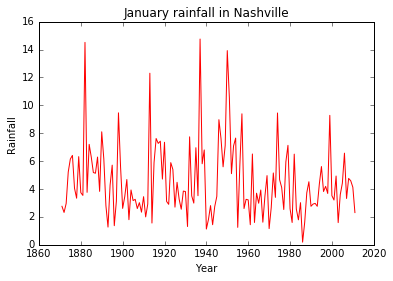

In [7]:
plt.figure()
plt.plot(x, y, 'r')
plt.xlabel('Year')
plt.ylabel('Rainfall')
plt.title('January rainfall in Nashville')

It is straightforward to customize plotting symbols and create subplots.

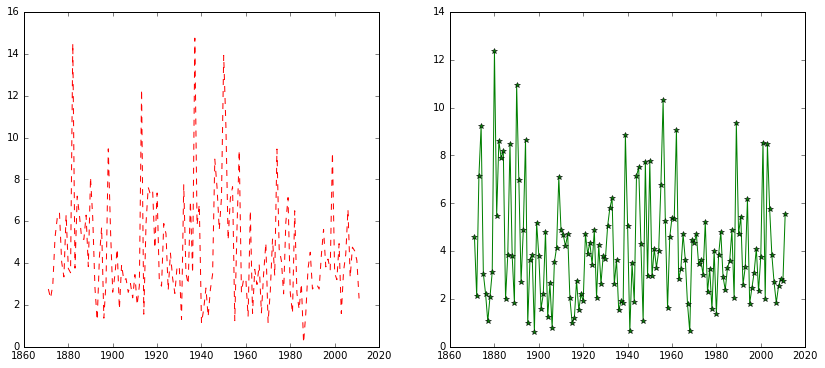

In [8]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(x, y, 'r--')
plt.subplot(1,2,2)
plt.plot(x, rain['Feb'], 'g*-')

While the MATLAB-like API is easy and convenient, it is worth learning matplotlib's object-oriented plotting API. It is remarkably powerful and for advanced figures, with subplots, insets and other components it is very nice to work with. 

## Object-oriented API

The main idea with object-oriented programming is to have objects with associated methods and functions that operate on them, and no object or program states should be global.

To use the object-oriented API we start out very much like in the previous example, but instead of creating a new global figure instance we store a reference to the newly created figure instance in the `fig` variable, and from it we create a new axis instance `axes` using the `add_axes` method in the `Figure` class instance `fig`.

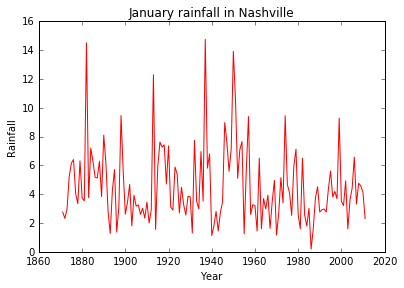

In [9]:
fig = plt.figure()

# left, bottom, width, height (range 0 to 1)
# as fractions of figure size
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) 

axes.plot(x, y, 'r')

axes.set_xlabel('Year')
axes.set_ylabel('Rainfall')
axes.set_title('January rainfall in Nashville');

Although a little bit more code is involved, the advantage is that we now have full control of where the plot axes are place, and we can easily add more than one axis to the figure.

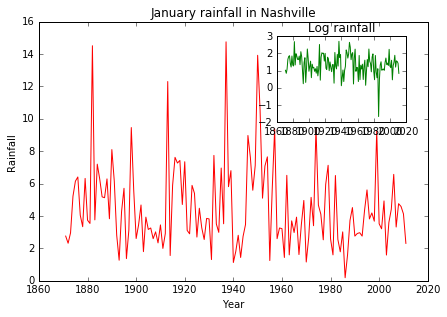

In [10]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.9, 0.9]) # main axes
axes2 = fig.add_axes([0.65, 0.65, 0.3, 0.3]) # inset axes

# main figure
axes1.plot(x, y, 'r')
axes1.set_xlabel('Year')
axes1.set_ylabel('Rainfall')
axes1.set_title('January rainfall in Nashville');

# insert
axes2.plot(x, np.log(y), 'g')
axes2.set_title('Log rainfall');

If we don't care to be explicit about where our plot axes are placed in the figure canvas, then we can use one of the many axis layout managers in matplotlib, such as `subplots`.

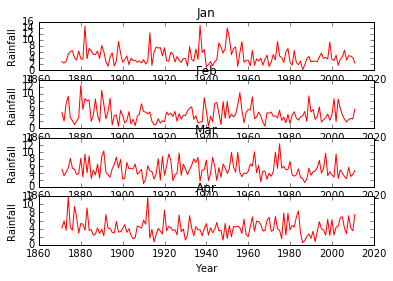

In [11]:
fig, axes = plt.subplots(nrows=4, ncols=1)

months = rain.columns

for i,ax in enumerate(axes):
    ax.plot(x, rain[months[i]], 'r')
    ax.set_xlabel('Year')
    ax.set_ylabel('Rainfall')
    ax.set_title(months[i])
    

That was easy, but it's not so pretty with overlapping figure axes and labels, right?

We can deal with that by using the `fig.tight_layout` method, which automatically adjusts the positions of the axes on the figure canvas so that there is no overlapping content:

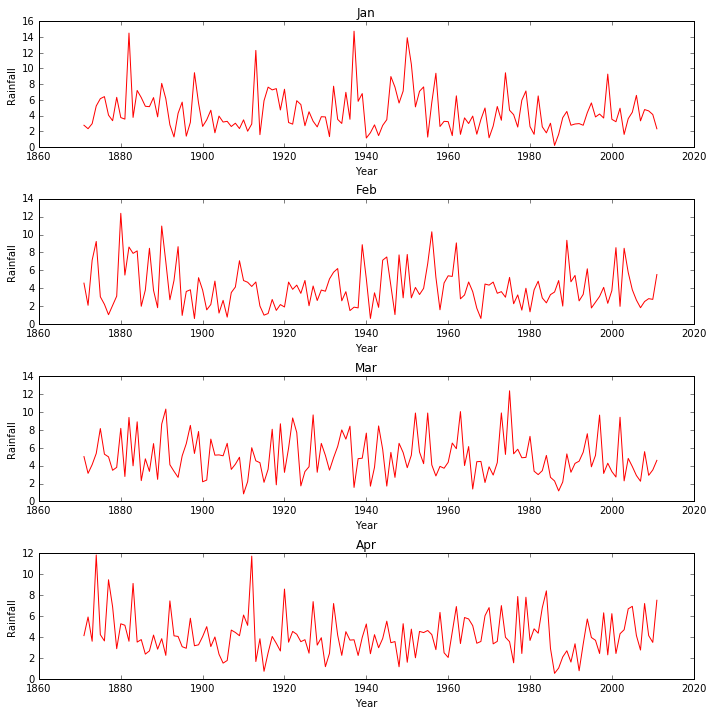

In [12]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10,10))

for i,ax in enumerate(axes):
    ax.plot(x, rain[months[i]], 'r')
    ax.set_xlabel('Year')
    ax.set_ylabel('Rainfall')
    ax.set_title(months[i])
    
fig.tight_layout()

## Manipulating figure attributes

Matplotlib allows the aspect ratio, DPI and figure size to be specified when the `Figure` object is created, using the `figsize` and `dpi` keyword arguments. `figsize` is a tuple with width and height of the figure in inches, and `dpi` is the dot-per-inch (pixel per inch). To create a figure with size 800 by 400 pixels we can do: 

In [13]:
fig = plt.figure(figsize=(8,4), dpi=100)

The same arguments can also be passed to layout managers, such as the `subplots` function.

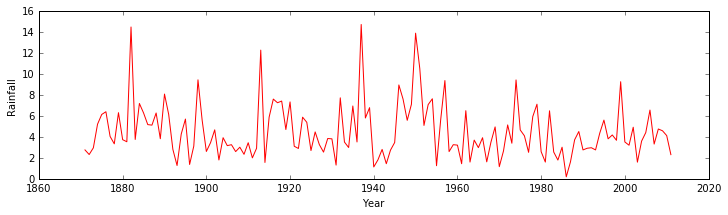

In [14]:
fig, axes = plt.subplots(figsize=(12,3))

axes.plot(x, y, 'r')
axes.set_xlabel('Year')
axes.set_ylabel('Rainfall')

Legends can also be added to identify labelled data.

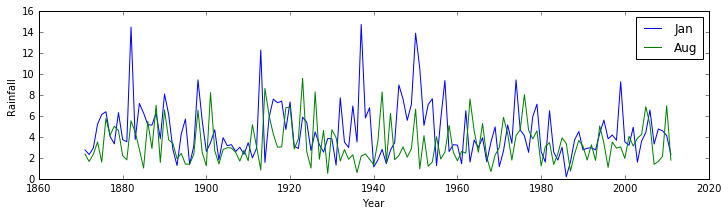

In [15]:
fig, ax = plt.subplots(figsize=(12,3))

ax.plot(x, rain['Jan'], label="Jan")
ax.plot(x, rain['Aug'], label="Aug")
ax.set_xlabel('Year')
ax.set_ylabel('Rainfall')
ax.legend(loc=1); # upper left corner

Visualizations can be fine tuned in maplotlib, using the attibutes of the figure and axes.

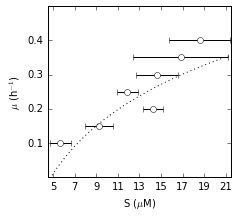

In [16]:
fig = plt.figure(figsize=(3.54, 3.2))
ax = fig.add_subplot(111)

muy = [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.52,0.54]
sx = [5.668743677,9.254533132,14.23590137,11.87910853,14.6118157,16.8120231,18.58892361,100.1652558,443.4712272]
er = [0.986042277,1.328704279,0.913025089,0.997960015,1.921483929,4.435,2.817,0,0]

gensub = np.arange(0, 25, 0.1)
mon = [0.2386*np.log(i)-0.3751 for i in gensub]

fig.subplots_adjust(left=0.19, bottom=0.16, right=0.91)

ax.set_ylabel("$\mu$ (h$^{-1}$)")
ax.set_xlabel("S ($\mu$M)")

ax.set_xticks(np.arange(5, 23, 2))
ax.set_xlim(4.5, 21.5)

ax.set_yticks(np.arange(0.1, 0.5, 0.1))
ax.set_ylim(0, 0.5)

ax.errorbar(sx, muy, xerr=er, barsabove=True, ls="none", marker="o", mfc="w", color="k")
ax.plot(gensub, mon, ls="dotted", marker="None", mfc="k", color="k")

# Plotting with Pandas

matplotlib is a relatively *low-level* plotting package, relative to others. It makes very few assumptions about what constitutes good layout (by design), but has a lot of flexiblility to allow the user to completely customize the look of the output.

On the other hand, Pandas includes methods for DataFrame and Series objects that are relatively high-level, and that make reasonable assumptions about how the plot should look.

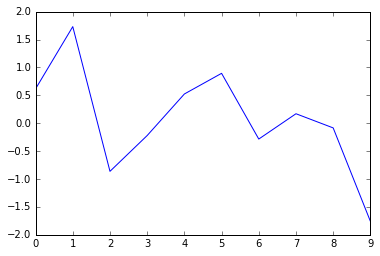

In [17]:
normals = pd.Series(np.random.normal(size=10))
normals.plot()

Notice that by default a line plot is drawn, and light background is included. These decisions were made on your behalf by pandas.

All of this can be changed, however:

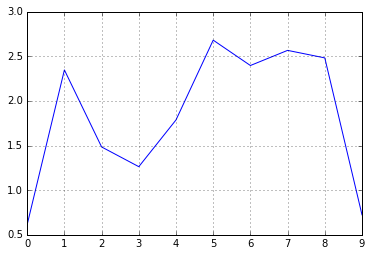

In [18]:
normals.cumsum().plot(grid=True)

Similarly, for a DataFrame:

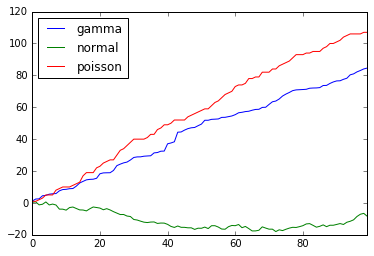

In [19]:
variables = pd.DataFrame({'normal': np.random.normal(size=100), 
                       'gamma': np.random.gamma(1, size=100), 
                       'poisson': np.random.poisson(size=100)})
variables.cumsum(0).plot()

As an illustration of the high-level nature of Pandas plots, we can split multiple series into subplots with a single argument for `plot`:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B97D320>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000000009195EF0>], dtype=object)

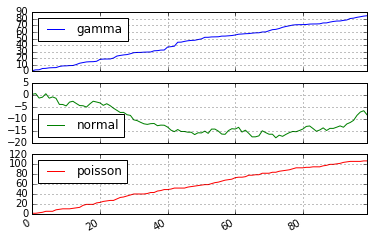

In [20]:
variables.cumsum(0).plot(subplots=True, grid=True)

Or, we may want to have some series displayed on the secondary y-axis, which can allow for greater detail and less empty space:

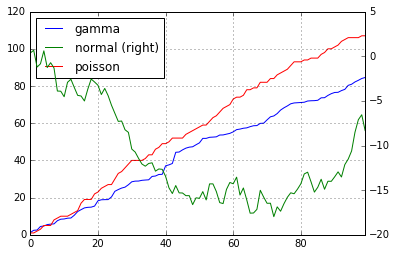

In [21]:
variables.cumsum(0).plot(secondary_y='normal', grid=True)

If we would like a little more control, we can use matplotlib's `subplots` function directly, and manually assign plots to its axes:

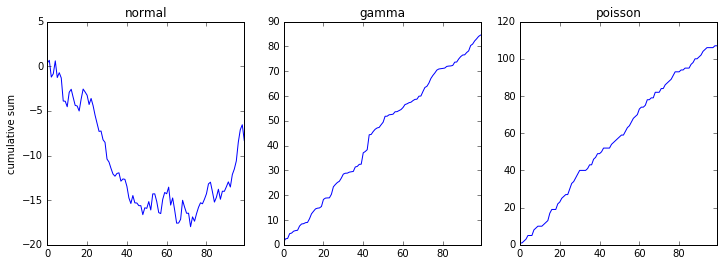

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i,var in enumerate(['normal','gamma','poisson']):
    variables[var].cumsum(0).plot(ax=axes[i], title=var)
axes[0].set_ylabel('cumulative sum')

## Bar plots

Bar plots are useful for displaying and comparing measurable quantities, such as counts or volumes. In Pandas, we just use the `plot` method with a `kind='bar'` argument.

For this series of examples, let's load up the Titanic dataset:

In [23]:
titanic = pd.read_excel("../data/titanic.xls", "titanic")
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


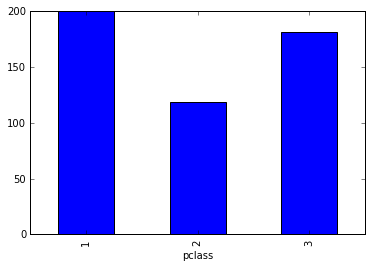

In [24]:
titanic.groupby('pclass').survived.sum().plot.bar()

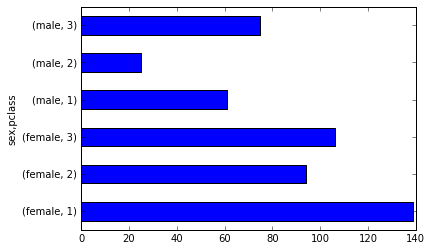

In [25]:
titanic.groupby(['sex','pclass']).survived.sum().plot.barh()

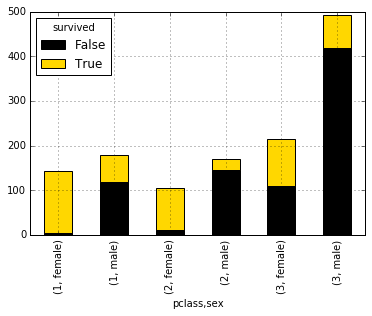

In [26]:
death_counts = pd.crosstab([titanic.pclass, titanic.sex], titanic.survived.astype(bool))
death_counts.plot.bar(stacked=True, color=['black','gold'], grid=True)

In [28]:
death_counts.head()

survived       False  True 
pclass sex                 
1      female      5    139
       male      118     61
2      female     12     94
       male      146     25
3      female    110    106

Another way of comparing the groups is to look at the survival *rate*, by adjusting for the number of people in each group.

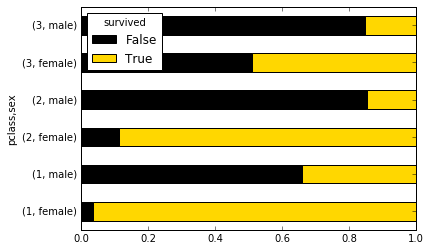

In [27]:
death_counts.div(death_counts.sum(1).astype(float), axis=0).plot.barh(stacked=True, color=['black','gold'])

## Histograms

Frequenfly it is useful to look at the *distribution* of data before you analyze it. Histograms are a sort of bar graph that displays relative frequencies of data values; hence, the y-axis is always some measure of frequency. This can either be raw counts of values or scaled proportions.

For example, we might want to see how the fares were distributed aboard the titanic:

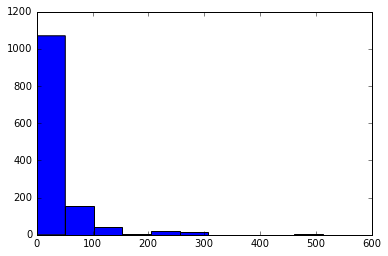

In [29]:
titanic.fare.hist(grid=False)

The `hist` method puts the continuous fare values into **bins**, trying to make a sensible décision about how many bins to use (or equivalently, how wide the bins are). We can override the default value (10):

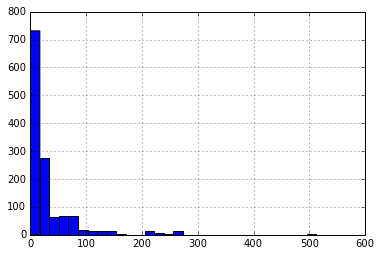

In [30]:
titanic.fare.hist(bins=30)

There are algorithms for determining an "optimal" number of bins, each of which varies somehow with the number of observations in the data series.

In [31]:
from scipy.stats import kurtosis
doanes = lambda data: int(1 + np.log(len(data)) + np.log(1 + kurtosis(data) * (len(data) / 6.) ** 0.5))

n = len(titanic)
doanes(titanic.fare.dropna())

14

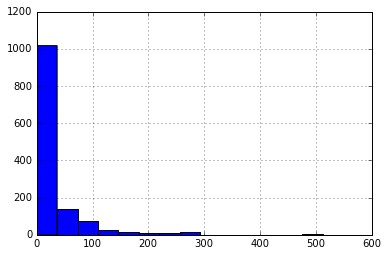

In [32]:
titanic.fare.hist(bins=doanes(titanic.fare.dropna()))

A **density plot** is similar to a histogram in that it describes the distribution of the underlying data, but rather than being a pure empirical representation, it is an *estimate* of the underlying "true" distribution. As a result, it is smoothed into a continuous line plot. We create them in Pandas using the `plot` method with `kind='kde'`, where `kde` stands for **kernel density estimate**.

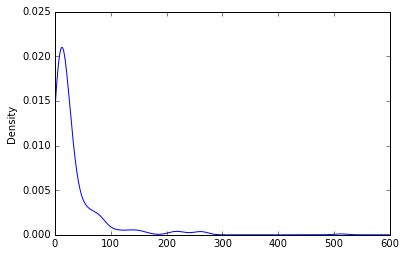

In [33]:
titanic.fare.dropna().plot.kde(xlim=(0,600))

Often, histograms and density plots are shown together:

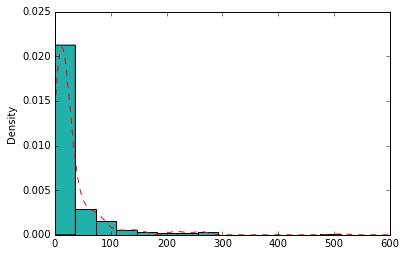

In [38]:
titanic.fare.hist(bins=doanes(titanic.fare.dropna()), normed=True, color='lightseagreen')
titanic.fare.dropna().plot.kde(xlim=(0,600), style='r--')

Here, we had to normalize the histogram (`normed=True`), since the kernel density is normalized by definition (it is a probability distribution).

We will explore kernel density estimates more in the next section.

## Boxplots

A different way of visualizing the distribution of data is the boxplot, which is a display of common quantiles; these are typically the quartiles and the lower and upper 5 percent values.

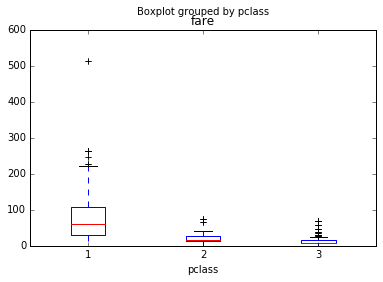

In [39]:
titanic.boxplot(column='fare', by='pclass', grid=False)

You can think of the box plot as viewing the distribution from above. The blue crosses are "outlier" points that occur outside the extreme quantiles.

One way to add additional information to a boxplot is to overlay the actual data; this is generally most suitable with small- or moderate-sized data series.

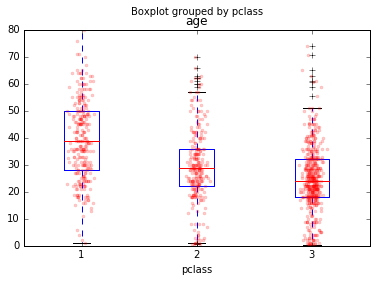

In [40]:
bp = titanic.boxplot(column='age', by='pclass', grid=False)
for i in [1,2,3]:
    y = titanic.age[titanic.pclass==i].dropna()
    # Add some random "jitter" to the x-axis
    x = np.random.normal(i, 0.04, size=len(y))
    plt.plot(x, y.values, 'r.', alpha=0.2)

When data are dense, a couple of tricks used above help the visualization:

1. reducing the alpha level to make the points partially transparent
2. adding random "jitter" along the x-axis to avoid overstriking

### Exercise

Using the Titanic data, create kernel density estimate plots of the age distributions of survivors and victims.

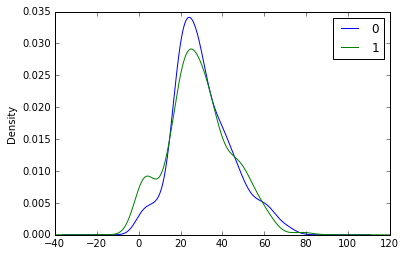

In [49]:
# Write your answer here
fig, axes = plt.subplots(nrows=1, ncols=1)
titanic.groupby('survived').age.plot.kde()
axes.legend(loc=1)

## Scatterplots

To look at how Pandas does scatterplots, let's look at a small dataset in wine chemistry.

In [50]:
wine = pd.read_table("../data/wine.dat", sep='\s+')

attributes = ['Grape',
            'Alcohol',
            'Malic acid',
            'Ash',
            'Alcalinity of ash',
            'Magnesium',
            'Total phenols',
            'Flavanoids',
            'Nonflavanoid phenols',
            'Proanthocyanins',
            'Color intensity',
            'Hue',
            'OD280/OD315 of diluted wines',
            'Proline']

wine.columns = attributes

Scatterplots are useful for data exploration, where we seek to uncover relationships among variables. There are no scatterplot methods for Series or DataFrame objects; we must instead use the matplotlib function `scatter`.

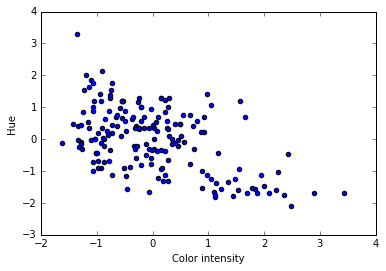

In [51]:
wine.plot.scatter('Color intensity', 'Hue')

We can add additional information to scatterplots by assigning variables to either the size of the symbols or their colors.

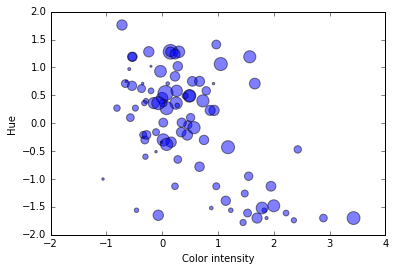

In [52]:
wine.plot.scatter('Color intensity', 'Hue', s=wine.Alcohol*100, alpha=0.5)

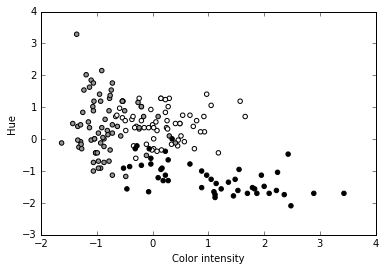

In [53]:
wine.plot.scatter('Color intensity', 'Hue', c=wine.Grape)

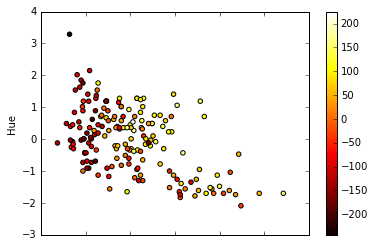

In [54]:
wine.plot.scatter('Color intensity', 'Hue', c=wine.Alcohol*100, cmap='hot')

To view scatterplots of a large numbers of variables simultaneously, we can use the `scatter_matrix` function that was recently added to Pandas. It generates a matrix of pair-wise scatterplots, optiorally with histograms or kernel density estimates on the diagonal.

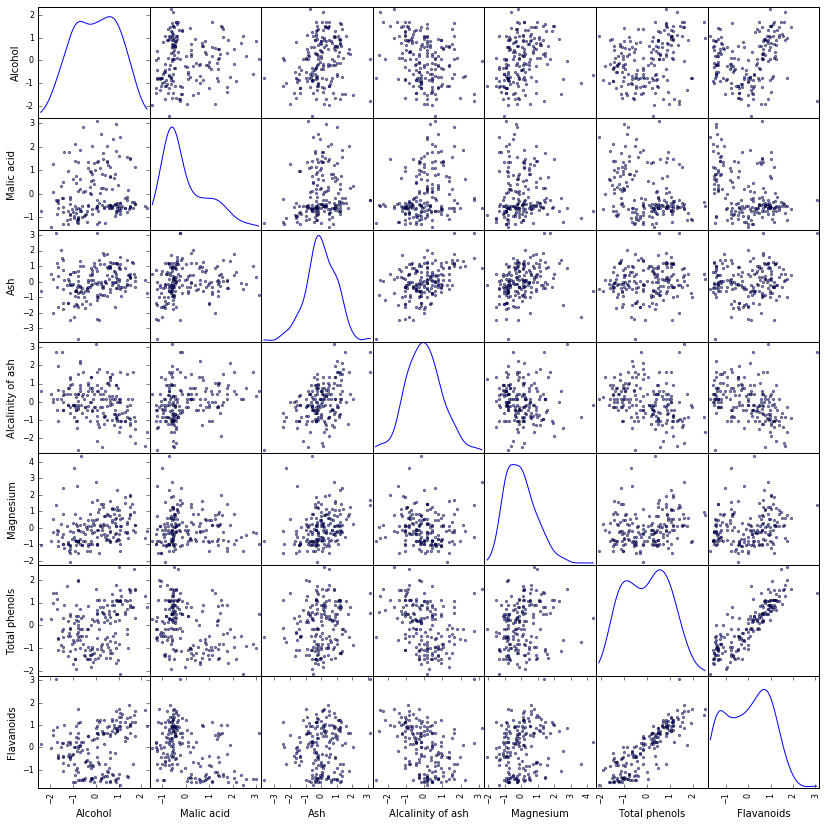

In [55]:
_ = pd.scatter_matrix(wine.loc[:, 'Alcohol':'Flavanoids'], figsize=(14,14), diagonal='kde')

# Seaborn

Seaborn is a modern data visualization tool for Python, created by Michael Waskom. Seaborn's high-level interface makes it easy to visually explore your data, by being able to easily iterate through different plot types and layouts with minimal hand-coding. In this way, Seaborn complements matplotlib (which we will learn about later) in the data science toolbox.

An easy way to see how Seaborn can immediately improve your data visualization, is by setting the plot style using one of its sevefral built-in styles.

Here is a simple pandas plot before Seaborn:

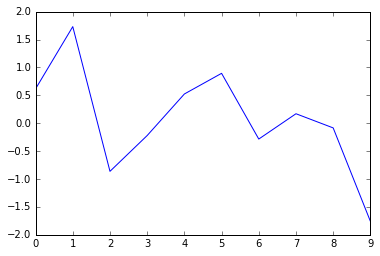

In [56]:
normals.plot()

Seaborn is conventionally imported using the `sns` alias. Simply importing Seaborn invokes the default Seaborn settings. These are generally more muted colors with a light gray background and subtle white grid lines. 

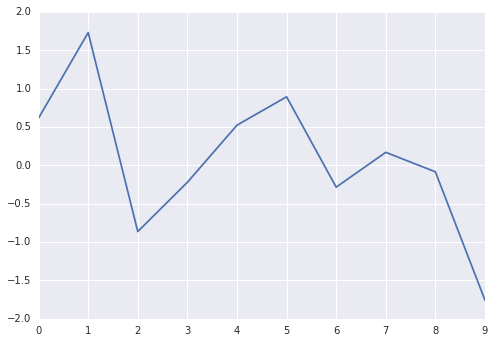

In [57]:
import seaborn as sns

normals.plot()

## Customizing Seaborn Figure Aesthetics

Seaborn manages plotting parameters in two general groups:

- setting components of aesthetic style of the plot
- scaling elements of the figure

This default theme is called `darkgrid`; there are a handful of preset themes:

- `darkgrid`
- `whitegrid` 
- `dark` 
- `white` 
- `ticks`

Each are suited to partiular applications. For example, in more "data-heavy" situations, one might want a lighter background.

We can apply an alternate theme using `set_style`:

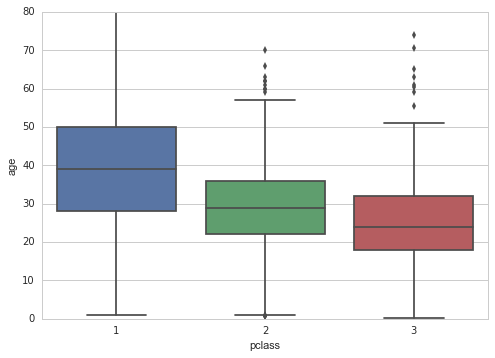

In [58]:
sns.set_style('whitegrid')
sns.boxplot(x='pclass', y='age', data=titanic)

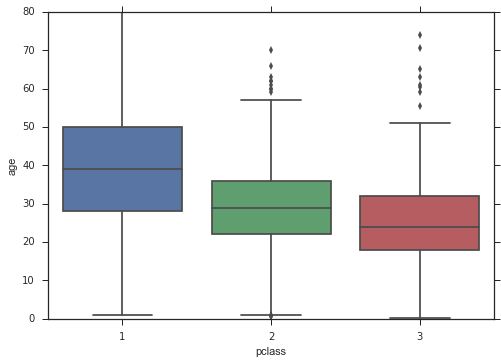

In [59]:
sns.set_style('ticks')
sns.boxplot(x='pclass', y='age', data=titanic)

The figure still looks heavy, with the axes distracting from the lines in the boxplot. We can remove them with `despine`:

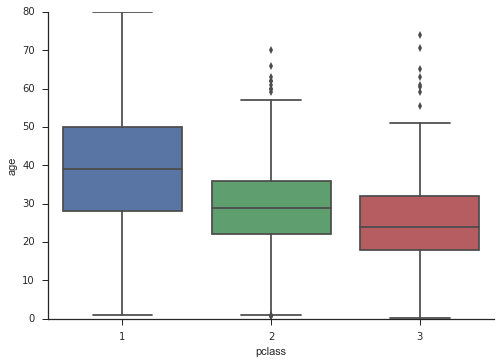

In [60]:
sns.boxplot(x='pclass', y='age', data=titanic)
sns.despine()

Finally, we can give the plot yet more space by specifying arguments to `despine`; specifically, we can move axes away from the figure elements (via `offset`) and minimize the length of the axes to the lowest and highest major tick value (via `trim`):

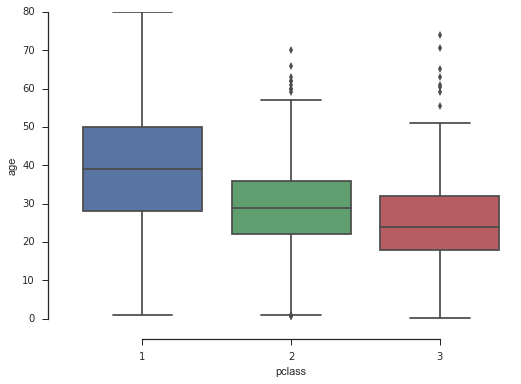

In [61]:
sns.boxplot(x='pclass', y='age', data=titanic)
sns.despine(offset=20, trim=True)

The second set of figure aesthetic parameters controls the scale of the plot elements.

There are four default scales that correspond to different **contexts** that a plot may be intended for use with.

- `paper`
- `notebook`
- `talk`
- `poster`

The default is `notebook`, which is optimized for use in Jupyter notebooks. We can change the scaling with `set_context`:

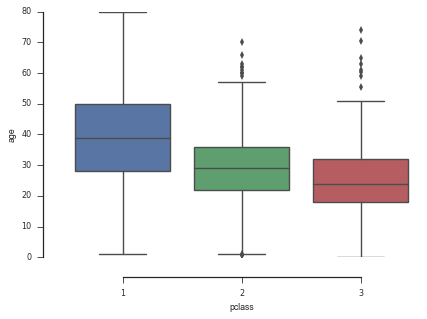

In [62]:
sns.set_context('paper')

sns.boxplot(x='pclass', y='age', data=titanic)
sns.despine(offset=20, trim=True)

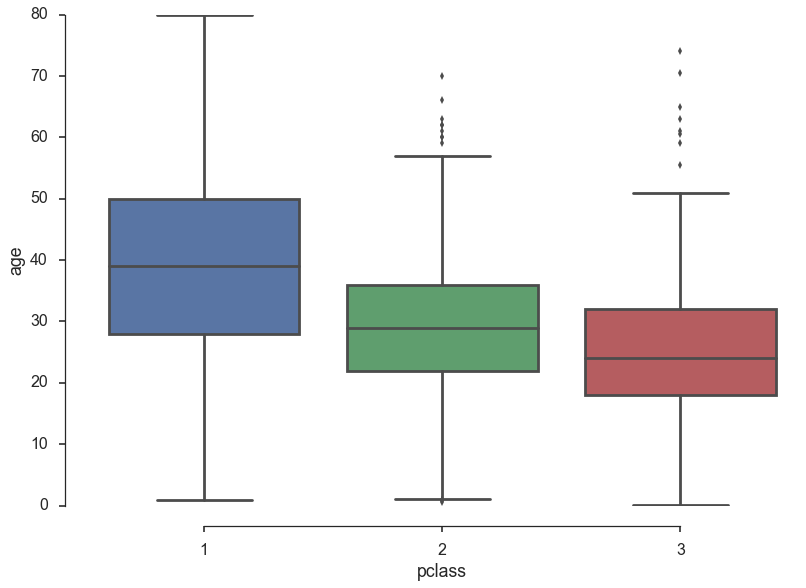

In [63]:
sns.set_context('poster')

sns.boxplot(x='pclass', y='age', data=titanic)
sns.despine(offset=20, trim=True)

Each of the contexts can be fine-tuned for more specific applications:

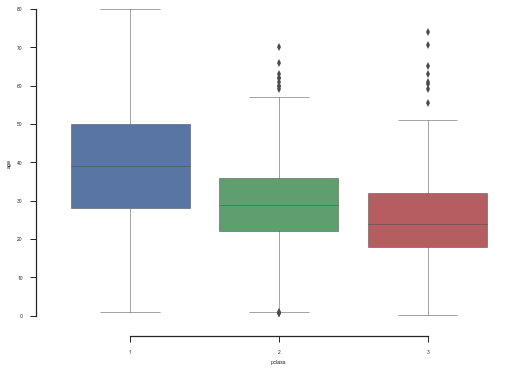

In [64]:
sns.set_context('notebook', font_scale=0.5, rc={'lines.linewidth': 0.5})

sns.boxplot(x='pclass', y='age', data=titanic)
sns.despine(offset=20, trim=True)

The detailed settings are available in the `plotting.context`:

In [65]:
sns.plotting_context()

{'axes.labelsize': 5.5,
 'axes.titlesize': 6.0,
 'figure.figsize': [8.0, 5.5],
 'font.size': 6.0,
 'grid.linewidth': 1.0,
 'legend.fontsize': 5.0,
 'lines.linewidth': 0.5,
 'lines.markeredgewidth': 0.0,
 'lines.markersize': 7.0,
 'patch.linewidth': 0.3,
 'xtick.labelsize': 5.0,
 'xtick.major.pad': 7.0,
 'xtick.major.width': 1.0,
 'xtick.minor.width': 0.5,
 'ytick.labelsize': 5.0,
 'ytick.major.pad': 7.0,
 'ytick.major.width': 1.0,
 'ytick.minor.width': 0.5}

Seaborn works hand-in-hand with pandas to create publication-quality visualizations quickly and easily from `DataFrame` and `Series` data.

For example, we can generate kernel density estimates of two sets of simulated data, via the `kdeplot` function.

In [66]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])
data.head()

,x,y
0,-4.973552,-1.891473
1,-1.225796,0.485891
2,-3.494664,-0.808437
3,-2.025139,-1.789912
4,-1.240658,-2.229200


C:\Users\jguo\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


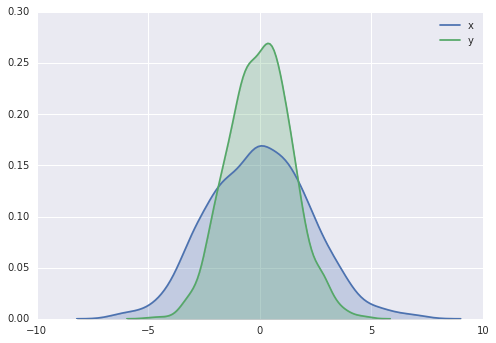

In [67]:
sns.set()

for col in 'xy':
    sns.kdeplot(data[col], shade=True)

`distplot` combines a kernel density estimate and a histogram.

C:\Users\jguo\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


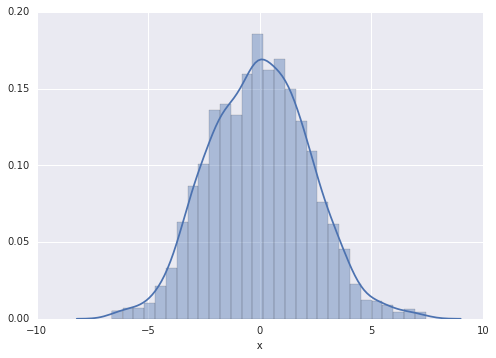

In [70]:
sns.distplot(data['x'])

If `kdeplot` is provided with two columns of data, it will automatically generate a contour plot of the joint KDE.

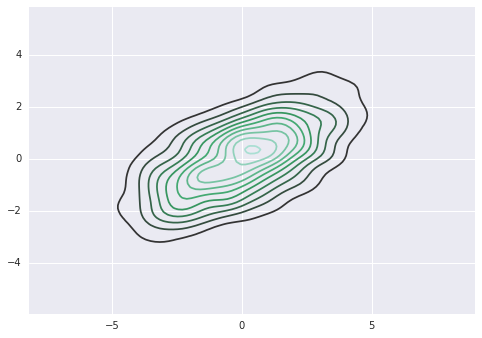

In [71]:
sns.kdeplot(data);

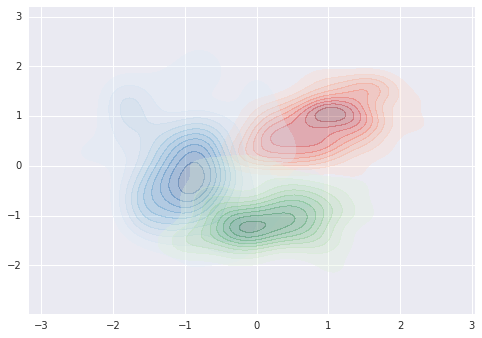

In [72]:
cmap = {1:'Reds', 2:'Blues', 3:'Greens'}

for grape in cmap:
    alcohol, phenols = wine.loc[wine.Grape==grape, ['Alcohol', 'Total phenols']].T.values
    
    sns.kdeplot(alcohol, phenols,
        cmap=cmap[grape], shade=True, shade_lowest=False, alpha=0.3)

Similarly, `jointplot` will generate a shaded joint KDE, along with the marginal KDEs of the two variables.

C:\Users\jguo\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


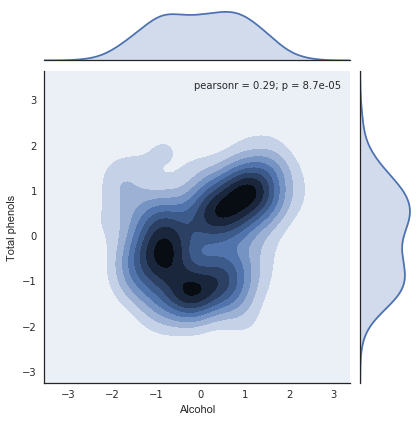

In [73]:
with sns.axes_style('white'):
    sns.jointplot("Alcohol", "Total phenols", wine, kind='kde');

Notice in the above, we used a **context manager** to temporarily assign a white axis stype to the plot. This is a great way of changing the defaults for just one figure, without having to set and then reset preferences.

You can do this with a number of the seaborn defaults. Here is a dictionary of the style settings:

In [74]:
sns.axes_style()

{'axes.axisbelow': True,
 'axes.edgecolor': 'white',
 'axes.facecolor': '#EAEAF2',
 'axes.grid': True,
 'axes.labelcolor': '.15',
 'axes.linewidth': 0.0,
 'figure.facecolor': 'white',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.color': 'white',
 'grid.linestyle': '-',
 'image.cmap': 'Greys',
 'legend.frameon': False,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'lines.solid_capstyle': 'round',
 'text.color': '.15',
 'xtick.color': '.15',
 'xtick.direction': 'out',
 'xtick.major.size': 0.0,
 'xtick.minor.size': 0.0,
 'ytick.color': '.15',
 'ytick.direction': 'out',
 'ytick.major.size': 0.0,
 'ytick.minor.size': 0.0}

C:\Users\jguo\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


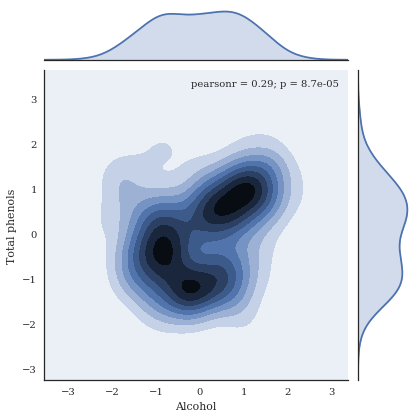

In [75]:
with sns.axes_style('white', {'font.family': ['serif']}):
    sns.jointplot("Alcohol", "Total phenols", wine, kind='kde');

To explore correlations among several variables, the `pairplot` function generates pairwise plots, along with histograms along the diagonal, and a fair bit of customization.

In [76]:
titanic = titanic[titanic.age.notnull() & titanic.fare.notnull()]

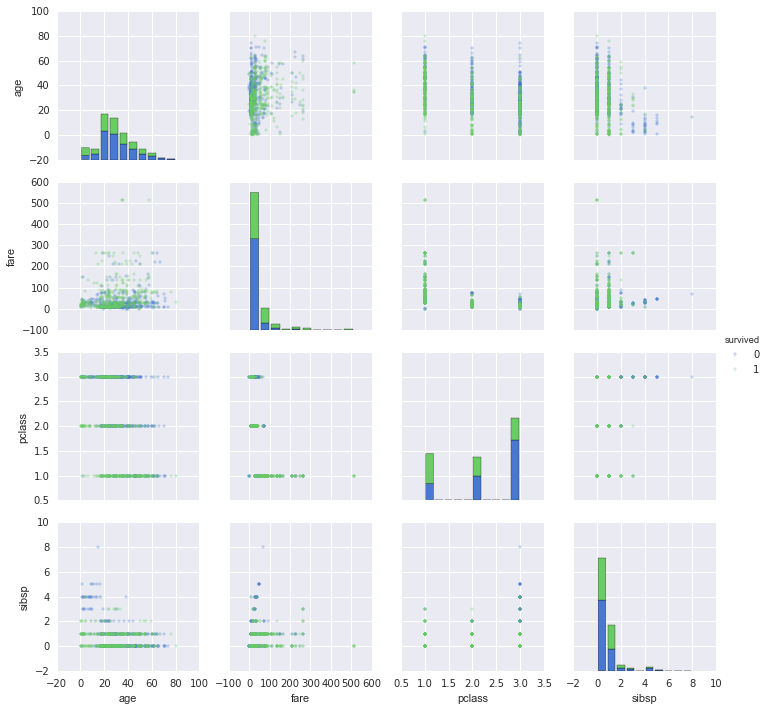

In [77]:
sns.pairplot(titanic, vars=['age', 'fare', 'pclass', 'sibsp'], hue='survived', palette="muted", markers='+')

## Plotting Small Multiples on Data-aware Grids

The `pairplot` above is an example of replicating the same visualization on different subsets of a particular dataset. This facilitates easy visual comparisons among groups, making otherwise-hidden patterns in complex data more apparent. 

Seaborn affords a flexible means for generating plots on "data-aware grids", provided that your pandas `DataFrame` is structured appropriately. In particular, you need to organize your variables into columns and your observations (replicates) into rows. Using this baseline pattern of organization, you can take advantage of Seaborn's functions for easily creating lattice plots from your dataset.

`FacetGrid` is a Seaborn object for plotting mutliple variables simulaneously as trellis plots. Variables can be assigned to one of three dimensions of the `FacetGrid`:

- rows
- columns
- colors (hue)

Let's use the `titanic` dataset to create a trellis plot that represents 3 variables at a time. This consists of 2 steps:

1. Create a `FacetGrid` object that relates two variables in the dataset in a grid of pairwise comparisons.
2. Add the actual plot (`distplot`) that will be used to visualize each comparison.

The first step creates a set of axes, according to the dimensions passed as `row` and `col`. These axes are empty, however:

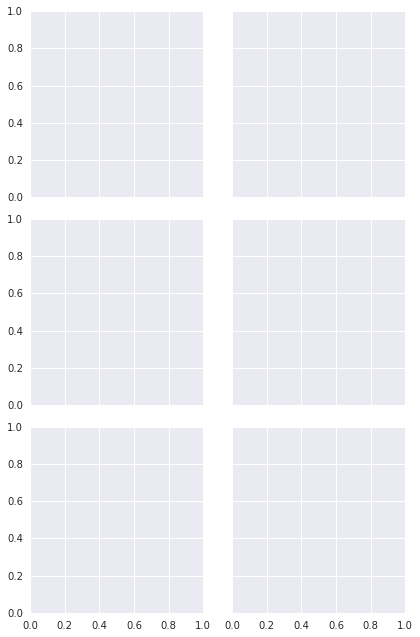

In [78]:
sns.FacetGrid(titanic, col="sex", row="pclass")

The `FacetGrid`'s `map` method then allows a third variable to be plotted in each grid cell, according to the plot type passed. For example, a `distplot` will generate both a **histogram** and **kernel density estimate** for `age`, according each combination of sex and passenger class as follows:

C:\Users\jguo\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


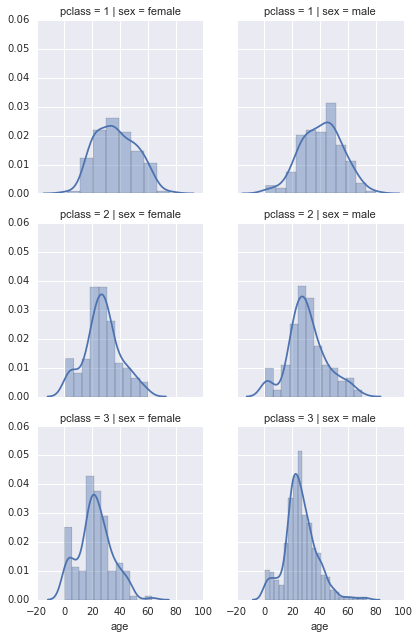

In [79]:
g = sns.FacetGrid(titanic, col="sex", row="pclass")
g.map(sns.distplot, 'age')

To more fully explore trellis plots in Seaborn, we will use a biomedical dataset. These data are from a multicenter, randomized controlled trial of botulinum toxin type B (BotB) in patients with cervical dystonia from nine U.S. sites.

* Randomized to placebo (N=36), 5000 units of BotB (N=36), 10,000 units of BotB (N=37)
* Response variable: total score on Toronto Western Spasmodic Torticollis Rating Scale (TWSTRS), measuring severity, pain, and disability of cervical dystonia (high scores mean more impairment)
* TWSTRS measured at baseline (week 0) and weeks 2, 4, 8, 12, 16 after treatment began

In [80]:
cdystonia = pd.read_csv('../data/cdystonia.csv')
cdystonia.head()

,patient,obs,week,site,id,treat,age,sex,twstrs
0,1,1,0,1,1,5000U,65,F,32
1,1,2,2,1,1,5000U,65,F,30
2,1,3,4,1,1,5000U,65,F,24
3,1,4,8,1,1,5000U,65,F,37
4,1,5,12,1,1,5000U,65,F,39


Notice that this data represents **time series** of individual patients, comprised of follow-up measurements at 2-4 week intervals following treatment.

As a first pass, we may wish to see how the trajectories of outcomes vary from patient to patient. Using `pointplot`, we can create a grid of plots to represent the time series for each patient. Let's just look at the first 12 patients:

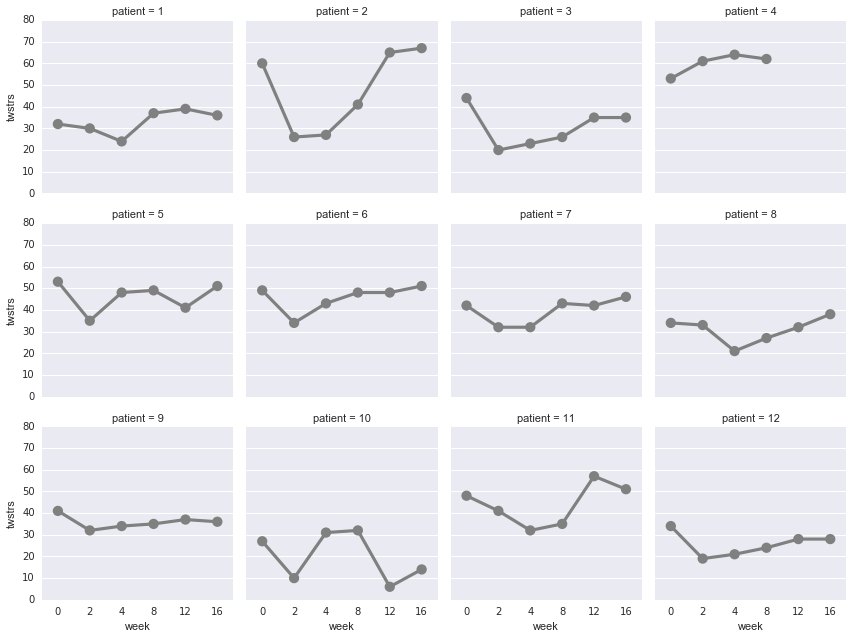

In [81]:
g = sns.FacetGrid(cdystonia[cdystonia.patient<=12], col='patient', col_wrap=4)
g.map(sns.pointplot, 'week', 'twstrs', color='0.5')

Where `pointplot` is particularly useful is in representing the central tendency and variance of multiple replicate measurements. Having examined individual responses to treatment, we may now want to look at the average response among treatment groups. Where there are mutluple outcomes (y variable) for each predictor (x variable), `pointplot` will plot the mean, and calculate the 95% confidence interval for the mean, using bootstrapping:

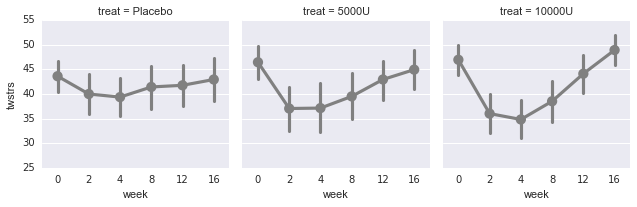

In [82]:
ordered_treat = ['Placebo', '5000U', '10000U']
g = sns.FacetGrid(cdystonia, col='treat', col_order=ordered_treat)
g.map(sns.pointplot, 'week', 'twstrs', color='0.5')

Notice that to enforce the desired order of the facets (lowest to highest treatment level), the labels were passed as a `col_order` argument to `FacetGrid`.

Let's revisit the `distplot` function to look at how the disribution of the outcome variables vary by time and treatment. Instead of a histogram, however, we will here include the "rug", which are just the locations of individual data points that were used to fit the kernel density estimate.

C:\Users\jguo\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


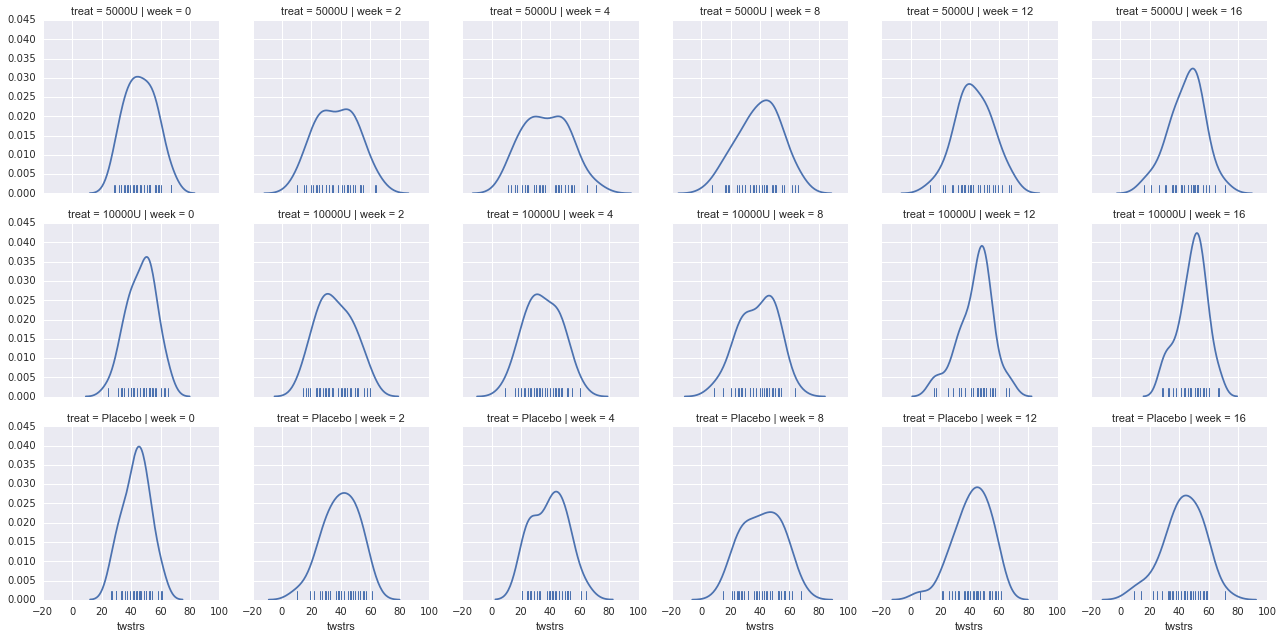

In [83]:
g = sns.FacetGrid(cdystonia, row='treat', col='week')
g.map(sns.distplot, 'twstrs', hist=False, rug=True)

`displot` can also fit parametric data models (instead of a kde). For example, we may wish to fit the data to normal distributions. We can used the distributions included in the SciPy package; Seaborn knows how to use these distributions to generate a fit to the data.

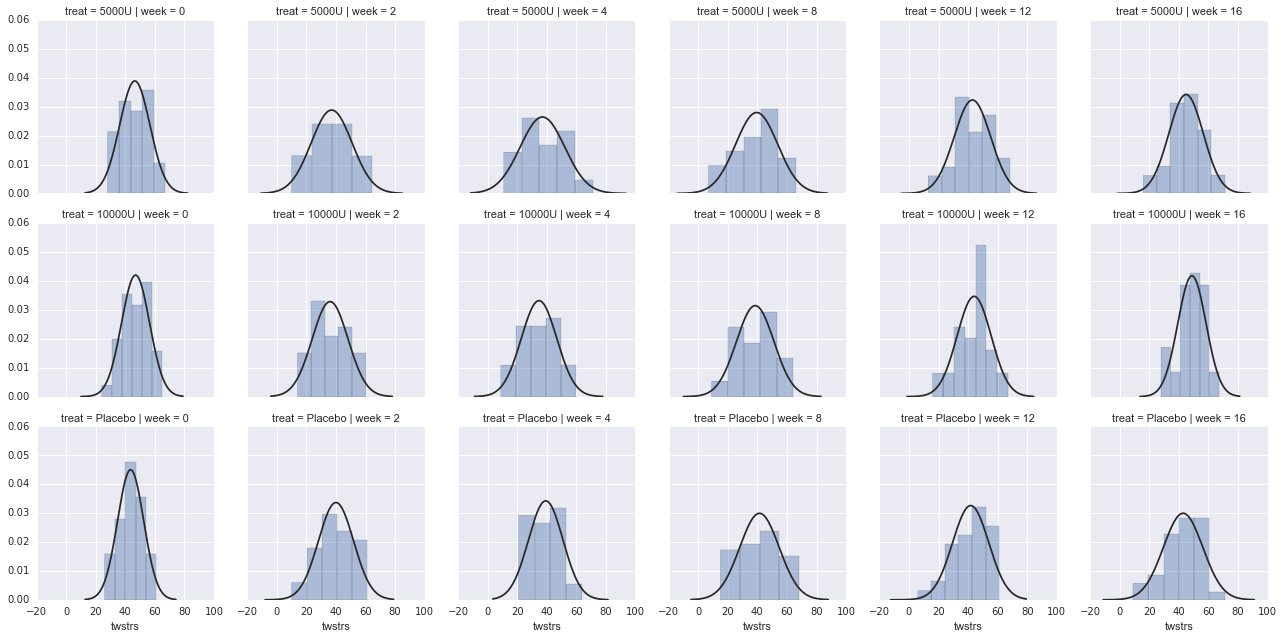

In [84]:
from scipy.stats import norm

g = sns.FacetGrid(cdystonia, row='treat', col='week')
g.map(sns.distplot, 'twstrs', kde=False, fit=norm)

We can take the statistical analysis a step further, by using `regplot` to conduct regression analyses.

For example, we can simultaneously examine the relationship between age and the primary outcome variable as a function of both the treatment received and the week of the treatment by creating a scatterplot of the data, and fitting a linear relationship between `age` and `twstrs`:

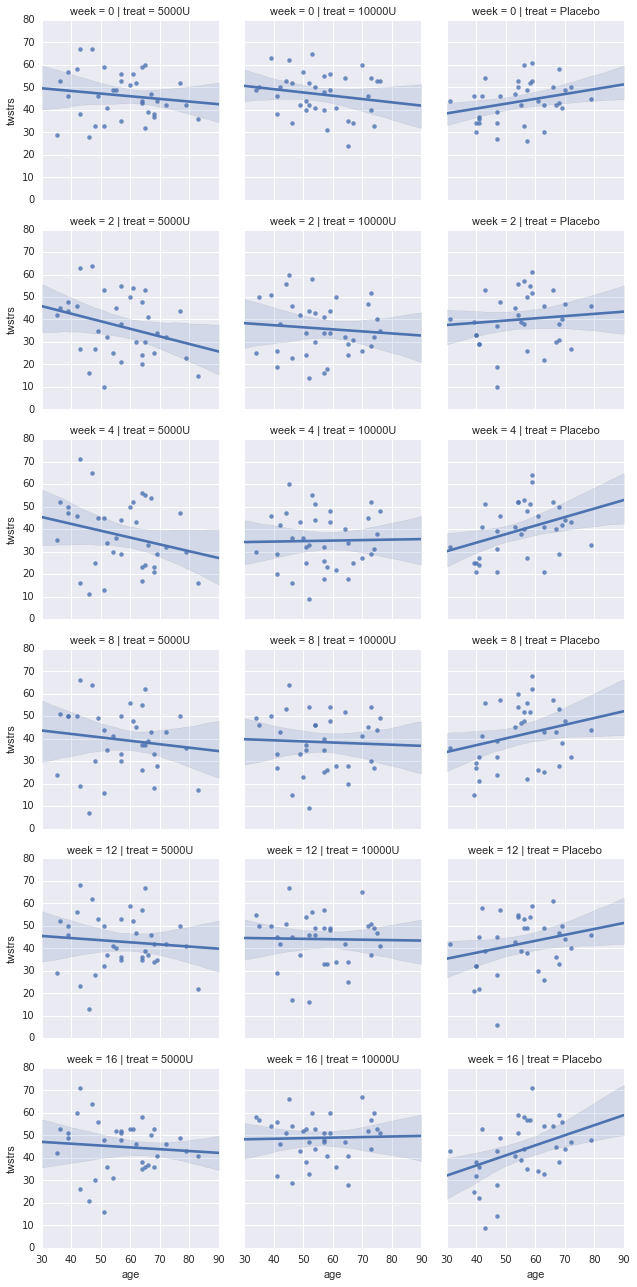

In [85]:
g = sns.FacetGrid(cdystonia, col='treat', row='week')
g.map(sns.regplot, 'age', 'twstrs')

## Exercise

From the `AIS` subdirectory of the data directory, import both the `vessel_information` table and `transit_segments` table and join them. Use the resulting table to create a faceted scatterplot of segment length (`seg_length`) and average speed (`avg_sog`) as a trellis plot by flag and vessel type.

To simplify the plot, first generate a subset of the data that includes only cargo, tanker and passenger ship types for the 5 most common countries.

In [ ]:
segments = pd.read_csv('../data/AIS/transit_segments.csv')
segments.head()

In [ ]:
# Write your answer here

## References

* Rougier NP, Droettboom M, Bourne PE. Ten Simple Rules for Better Figures. PLoS Comput Biol. 2014;10(9):e1003833. [doi:10.1371/journal.pcbi.1003833](http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833).
* Waskom, M. [Seaborn Tutorial](https://stanford.edu/~mwaskom/software/seaborn/tutorial.html)
* VanderPlas, J. [Data visualization with Seaborn](https://www.oreilly.com/learning/data-visualization-with-seaborn), O'Reilly.